# Idee der Householdertransformation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
from numpy.linalg import norm

In [2]:
np.set_printoptions(precision=2,suppress=True)

Wir betrachten die Idee der Householdertransformation am Beispiel einer 2x2 Matrix:

In [3]:
A0 = np.array([[1,7],[3,3]])
print(A0)

[[1 7]
 [3 3]]


- In einem ersten Schritt Betrachten wir die erste Spalte.
- Gesucht ist daher eine geeignete Spiegelungsebene so, dass der erste Spaltenvektor zum $\pm$ Einheitsvektor $e_1$ gespiegelt wird.

In [4]:
def HouseholderTransformation(w):
    return np.eye(w.shape[0])-2*np.outer(w,w)/np.dot(w,w)
def normalVector(alpha):
    return np.array([np.cos(alpha), np.sin(alpha)])
def tangentialVector(alpha):
    return np.array([np.sin(alpha), -np.cos(alpha)])

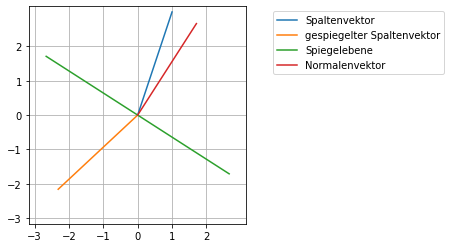

In [5]:
def f(alpha):
    n = normalVector(alpha)
    t = tangentialVector(alpha)
    y = A0[:,0]
    Hy = HouseholderTransformation(n).dot(y)
    normy = np.sqrt(y.dot(y))
    tpt = np.linspace(-normy,normy,2)
    tpn = np.linspace(0,normy,2)
    tpy = np.linspace(0,1,2)
    plt.plot(tpy*y[0],tpy*y[1],label='Spaltenvektor')
    plt.plot(tpy*Hy[0],tpy*Hy[1],label='gespiegelter Spaltenvektor')
    plt.plot(tpt*t[0],tpt*t[1],label='Spiegelebene')
    plt.plot(tpn*n[0],tpn*n[1],label='Normalenvektor')
    plt.gca().set_aspect(1)
    plt.legend(bbox_to_anchor=(1.1,1))
    plt.grid()
    plt.xticks(np.arange(-np.round(normy),np.round(normy)))
    plt.yticks(np.arange(-np.round(normy),np.round(normy)))
    plt.xlim(-normy,normy)
    plt.ylim(-normy,normy)
    plt.show()
f(1)

In [6]:
interactive_plot = interactive(f, alpha=(-np.pi/2, np.pi/2,1e-3))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=-0.0007963267948964958, description='alpha', max=1.5707963267948966, m…

Gesucht ist daher der geeignete Normalenvektor so, dass der gespiegelte Spaltenvektor auf die $e_1$ Achse zu liegen kommt.

Sei mit $y$ der Spaltenvektor bezeichnet, so kann man zeigen (siehe Skript), dass der Vektor

$$w = y \pm \|y\|_2 e_1$$

die gewünschte Eigenschaft hat. Um **Auslöschung** in der Berechnung von $w$ zu vermeiden, wählt man

$$w = y + \text{sign}(y_1) \|y\|_2 e_1$$

mit

$$\text{sign}(s) = \begin{cases} 1 & \quad \text{für} s \ge 0\\ -1 & \quad \text{sonst}.\end{cases}$$



In [7]:
def mysign(x): # numpy sign liefert 0 für 0
    if x >= 0:
        return 1
    else:
        return -1

Funktion für den n-dimensionalen Einheitsvektor

In [8]:
def e(n):
    return np.array([1]+[0 for k in range(n-1)])

## Schrittweise QR-Zerlegung mit Hilfe der Householder-Transformation

Mit Hilfe der Householder-Transformation soll nun die Matrix $A$ in eine orthogonale Matrix $Q$ und reguläre obere Dreiecksmatrix $R$ zerlegt werden.

Im Beispiel wählen wir eine beliebige Matrix $A \in \mathbb{R}^{10\times5}$.

In [9]:
A = np.array([[-1,  7, -8, -9,  6],
       [-6, -8,  0,  3,  8],
       [-4, -2,  8,  0, -2],
       [-1, -9,  4, -8,  2],
       [-3, -5, -5,  7, -4],
       [-7, -4,  7, -1,  5],
       [-9, -7,  6, -5, -8],
       [-4, -3, -5,  3, -6],
       [ 5,  7,  5, -4, -5],
       [ 4, -6, -8, -2, -5]],dtype=float)
m,n = A.shape
print(m,n)

10 5


### 1. Spalte

In [10]:
k = 0

Die Hyperebene ist definiert durch

In [11]:
w = A[k:,k] + mysign(A[k,k])*norm(A[k:,k])*e(m-k)

Für die Householder-Transformationsmatrix angewand auf $A$ erhalten wir

In [12]:
Q1 = HouseholderTransformation(w)
A1 = Q1@A

In der ersten Spalte der Zwischenmatrix $A_1$ stehen nun abgesehen vom ersten Eintrag Nullen:

In [13]:
print(A1)

[[ 15.81  11.83  -6.51  -0.63  -1.26]
 [ -0.    -6.28   0.53   5.99   5.41]
 [ -0.    -0.85   8.35   1.99  -3.73]
 [ -0.    -8.71   4.09  -7.5    1.57]
 [ -0.    -4.14  -4.73   8.49  -5.3 ]
 [ -0.    -1.99   7.62   2.48   1.98]
 [ -0.    -4.42   6.8   -0.52 -11.89]
 [ -0.    -1.85  -4.65   4.99  -7.73]
 [  0.     5.56   4.56  -6.49  -2.84]
 [  0.    -7.15  -8.35  -3.99  -3.27]]


### 2. Spalte 

In [14]:
k = 1

Die Hyperebene ist definiert durch

In [15]:
w = A1[k:,k] + mysign(A1[k,k])*norm(A1[k:,k])*e(m-k)

wobei nun das letzte Resultat $A_1$ benutzt wird. Die Householder-Transformationsmatrix wird nun nur auf die Submatrix von $A_1$ angewand und in der Submatrix von $A_1$ wiederum gespeichert:

In [16]:
Q2 = HouseholderTransformation(w)
A1[k:,k:] = Q2@A1[k:,k:]

Die Dimension der zweiten Householder-Transformationsmatrix $Q_2$ ist

In [17]:
Q2.shape

(9, 9)

In dem ersten beiden Spalte der Zwischenmatrix $A_1$ steht:

In [18]:
print(A1)

[[ 15.81  11.83  -6.51  -0.63  -1.26]
 [ -0.    15.56   1.42  -1.83   3.08]
 [ -0.     0.     8.39   1.69  -3.82]
 [ -0.    -0.     4.44 -10.62   0.64]
 [ -0.     0.    -4.57   7.01  -5.74]
 [ -0.    -0.     7.7    1.77   1.76]
 [ -0.    -0.     6.97  -2.1  -12.36]
 [ -0.    -0.    -4.57   4.33  -7.93]
 [  0.    -0.     4.33  -4.5   -2.25]
 [  0.     0.    -8.06  -6.55  -4.03]]


### 3. - 5. Spalte 

Wir automatisieren nun den Prozess und überschreiben die Submatrizen der Matrix $A_1$ sukzessive:

In [19]:
for k in range(2,n):
    print('Spalte '+str(k+1))
    w = A1[k:,k] + mysign(A1[k,k])*norm(A1[k:,k])*e(m-k)
    Qk = HouseholderTransformation(w)
    A1[k:,k:] = Qk@A1[k:,k:]
    print(A1)

Spalte 3
[[ 15.81  11.83  -6.51  -0.63  -1.26]
 [ -0.    15.56   1.42  -1.83   3.08]
 [ -0.     0.   -17.99   2.92   0.92]
 [ -0.    -0.     0.   -10.41   1.44]
 [ -0.     0.    -0.     6.8   -6.56]
 [ -0.    -0.     0.     2.13   3.15]
 [ -0.    -0.     0.    -1.78 -11.11]
 [ -0.    -0.    -0.     4.11  -8.75]
 [  0.    -0.     0.    -4.29  -1.47]
 [  0.     0.    -0.    -6.93  -5.48]]
Spalte 4
[[ 15.81  11.83  -6.51  -0.63  -1.26]
 [ -0.    15.56   1.42  -1.83   3.08]
 [ -0.     0.   -17.99   2.92   0.92]
 [ -0.    -0.     0.    15.68  -1.59]
 [ -0.     0.    -0.    -0.    -5.77]
 [ -0.    -0.     0.    -0.     3.39]
 [ -0.    -0.     0.    -0.   -11.31]
 [ -0.    -0.    -0.     0.    -8.27]
 [  0.    -0.     0.     0.    -1.97]
 [  0.     0.    -0.    -0.    -6.29]]
Spalte 5
[[ 15.81  11.83  -6.51  -0.63  -1.26]
 [ -0.    15.56   1.42  -1.83   3.08]
 [ -0.     0.   -17.99   2.92   0.92]
 [ -0.    -0.     0.    15.68  -1.59]
 [ -0.     0.    -0.    -0.    16.87]
 [ -0.    -0.     0. 

## QR-Zerlegung

Wir berechnen nun alle Schritte in einer 'for'-Schlaufe und berechnen $Q^T$ so, dass
$$Q^T\cdot A = R$$
gilt.

In [20]:
A1 = A.copy()
QT = np.eye(m)
for k in range(0,n):
    w = A1[k:,k] + mysign(A1[k,k])*norm(A1[k:,k])*e(m-k)
    Qk = HouseholderTransformation(w)
    A1[k:,k:] = Qk@A1[k:,k:]
    Qkext = np.eye(m)
    Qkext[k:,k:] = Qk
    QT = Qkext@QT

Damit folgt

In [21]:
Q = QT.T
R = A1

und

In [22]:
A-Q@R

array([[-0.,  0., -0.,  0.,  0.],
       [-0., -0., -0.,  0.,  0.],
       [-0.,  0.,  0., -0., -0.],
       [-0., -0.,  0.,  0., -0.],
       [-0.,  0., -0.,  0.,  0.],
       [-0.,  0., -0., -0., -0.],
       [ 0.,  0., -0., -0.,  0.],
       [-0.,  0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0., -0., -0.,  0., -0.]])